<a href="https://colab.research.google.com/github/NervOUs11/Predict_CocaCola_Stock/blob/main/Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

# For use DataReader in pandas
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
#from keras.metrics import mean_absolute_error

In [3]:
#Load Data 
company = 'KO'

start = '2012-01-01'
end = '2022-01-01'

data = pdr.DataReader(company,'yahoo',start,end)

#Show
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,35.355000,35.049999,35.075001,35.070000,15639600.0,25.261484
2012-01-04,35.035000,34.750000,34.955002,34.849998,14239200.0,25.103003
2012-01-05,34.935001,34.674999,34.880001,34.685001,14287600.0,24.984152
2012-01-06,34.814999,34.310001,34.735001,34.465000,13646600.0,24.825695
2012-01-09,34.584999,34.400002,34.500000,34.465000,10522600.0,24.825695
...,...,...,...,...,...,...
2021-12-27,58.689999,58.000000,58.000000,58.650002,9860000.0,57.786949
2021-12-28,58.939999,58.299999,58.400002,58.880001,8979900.0,58.013565
2021-12-29,59.099998,58.660000,58.950001,58.950001,9996000.0,58.082535


In [4]:
# Get the number of rows and columns in the data set
data.shape

(2517, 6)

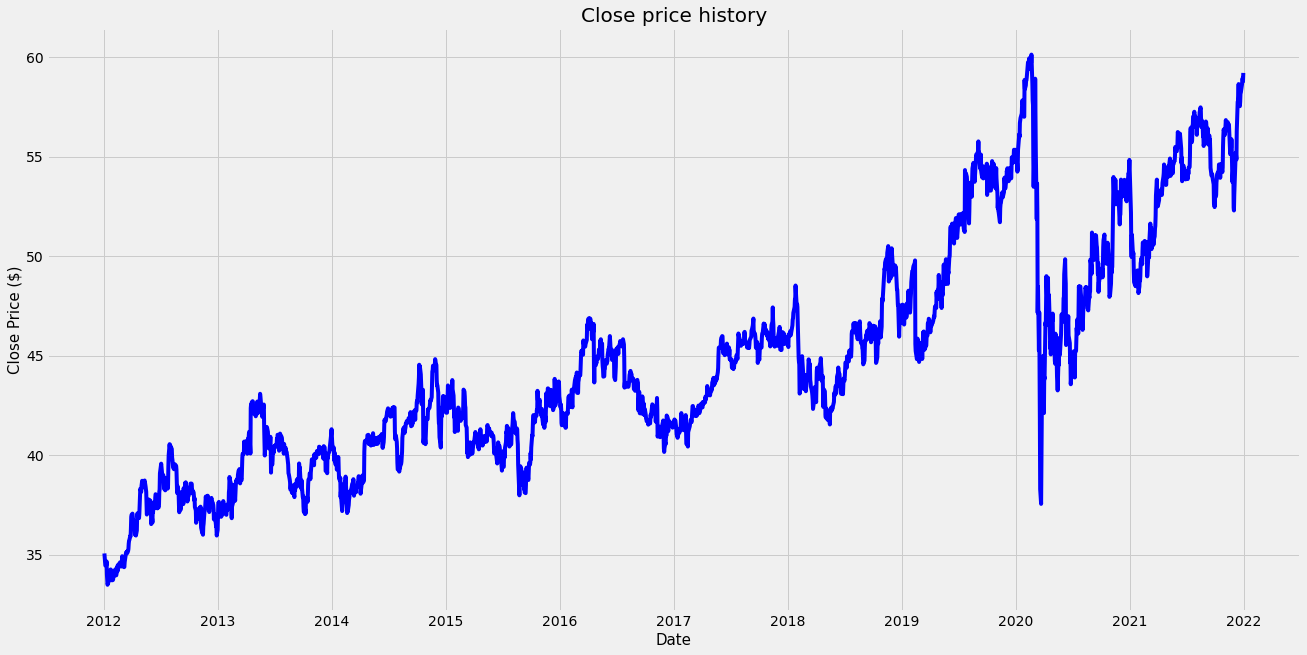

In [16]:
#Visualize the closing price
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
plt.title('Close price history',fontsize=20)
plt.plot(data['Close'], color='blue')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.show()

In [17]:
#Prepare data

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

scaled_data

array([[0.05913274],
       [0.05087289],
       [0.04467814],
       ...,
       [0.95569738],
       [0.94931473],
       [0.96545891]])

In [28]:
#Create attribute(x) and label(y)
prediction_days = 60

x_train = [] #Attribute
y_train = [] #Label

for i in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[i-prediction_days:i, 0])
  y_train.append(scaled_data[i, 0])


# Convert the x_train and y_train to numpy arrays
x_train , y_train = np.array(x_train) , np.array(y_train)

In [29]:
#Show Attribute
x_train

array([[0.05913274, 0.05087289, 0.04467814, ..., 0.09217202, 0.09160887,
        0.106439  ],
       [0.05087289, 0.04467814, 0.03641829, ..., 0.09160887, 0.106439  ,
        0.12802702],
       [0.04467814, 0.03641829, 0.03641829, ..., 0.106439  , 0.12802702,
        0.13178156],
       ...,
       [0.73193171, 0.73531073, 0.75896371, ..., 0.92828986, 0.94443404,
        0.95306927],
       [0.73531073, 0.75896371, 0.76534637, ..., 0.94443404, 0.95306927,
        0.95569738],
       [0.75896371, 0.76534637, 0.77435699, ..., 0.95306927, 0.95569738,
        0.94931473]])

In [30]:
#Show Label
y_train

array([0.12802702, 0.13178156, 0.13422191, ..., 0.95569738, 0.94931473,
       0.96545891])

In [32]:
#Show dimension
x_train.shape

(2457, 60)

In [33]:
#Reshape the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2457, 60, 1)

In [34]:
#Build the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=20, epochs=25)

Epoch 1/25
123/123 [==============================] - 16s 82ms/step - loss: 0.0110
Epoch 2/25
123/123 [==============================] - 10s 83ms/step - loss: 0.0046
Epoch 3/25
123/123 [==============================] - 13s 109ms/step - loss: 0.0039
Epoch 4/25
123/123 [==============================] - 10s 82ms/step - loss: 0.0035
Epoch 5/25
123/123 [==============================] - 10s 84ms/step - loss: 0.0028
Epoch 6/25
123/123 [==============================] - 10s 85ms/step - loss: 0.0026
Epoch 7/25
123/123 [==============================] - 10s 84ms/step - loss: 0.0023
Epoch 8/25
123/123 [==============================] - 10s 84ms/step - loss: 0.0023
Epoch 9/25
123/123 [==============================] - 11s 86ms/step - loss: 0.0017
Epoch 10/25
123/123 [==============================] - 11s 87ms/step - loss: 0.0017
Epoch 11/25
123/123 [==============================] - 10s 84ms/step - loss: 0.0015
Epoch 12/25
123/123 [==============================] - 10s 85ms/step - loss: 0.0015


In [35]:
#Load test data
test_start = '2020,01,01'
test_end =  dt.datetime.now()

test_data = pdr.DataReader(company, 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [36]:
#Make predictions on test data
x_test = []

for i in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[i-prediction_days:i, 0])

#Convert the data to numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Model predicted price values
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

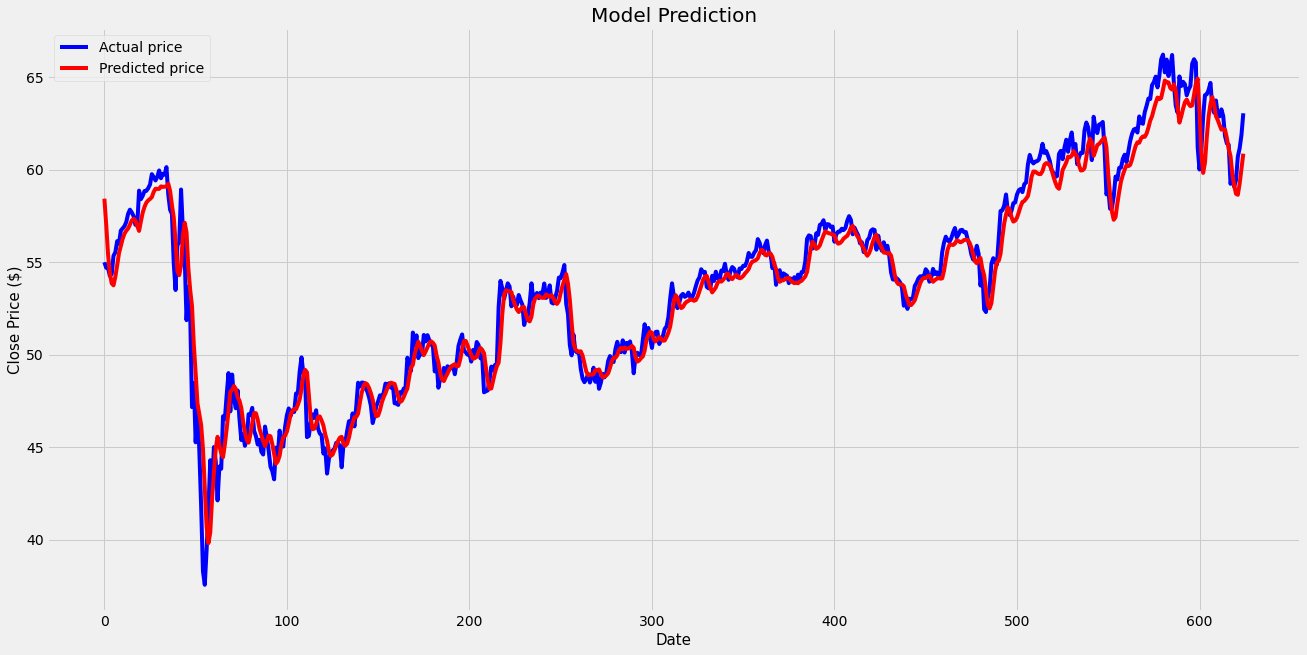

In [37]:
#Plot the test predictions
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
plt.title('Model Prediction',fontsize=20)
plt.plot(actual_prices, color='blue')
plt.plot(predicted_prices, color='red')
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price ($)',fontsize=15)
plt.legend(['Actual price','Predicted price'])
plt.show()

In [41]:
#Check the accuracy of predictions.
def mae(actual_prices, predicted_prices):
    actual_prices, predicted_prices = np.array(actual_prices), np.array(predicted_prices)
    return np.mean(np.abs(actual_prices - predicted_prices))

mae(actual_prices, predicted_prices)

6.16554499375

In [49]:
print("Real price is", actual_prices[-1:])
print("Predicted price is", predicted_prices[-1:])

Real price is [63.04000092]
Predicted price is [[60.857407]]


In [50]:
test_data_table = test_data.filter(['Close'])
checkPrice_table = test_data_table[:test_end]
checkPrice_table['Prediction'] = predicted_prices

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
checkPrice_table

,Close,Prediction
Date,,
2020-01-02,54.990002,58.424648
2020-01-03,54.689999,57.011932
2020-01-06,54.669998,55.411625
2020-01-07,54.250000,54.386280
2020-01-08,54.349998,53.849022
...,...,...
2022-06-17,59.430000,58.692341
2022-06-21,60.700001,58.633583
2022-06-22,61.150002,59.238403
